In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload


In [3]:
import sys
import os

# Ensure you are in the correct directory
os.chdir(r'G:\Programming\10_Academy\solar_radiation_EDA')

# Add the root directory to the Python path
sys.path.append(os.getcwd())
from scripts.analysis_script import *
import scripts.analysis_script as analysis_script

df_benin =pd.read_csv('data/benin-malanville.csv')
df_sierraleone =pd.read_csv('data/sierraleone-bumbuna.csv')
df_togo =pd.read_csv('data/togo-dapaong_qc.csv')
# print(df.head())
#copy of the dataframes
df_benin_cleaned=None
df_sierraleone_cleaned=None
df_togo_cleaned=None

In [ ]:
#check missing values in each column
check_missing_value(df_benin)
check_missing_value(df_sierraleone)
check_missing_value(df_togo)

In [4]:
#Replacing negative values in 'GHI', 'DNI', 'DHI' with zero since they are measuremet errors
df_benin_cleaned=replace_nagative_values(df_benin)
df_sierraleone_cleaned=replace_nagative_values(df_sierraleone)
df_togo_cleaned=replace_nagative_values(df_togo)
#Replace the outliers of 'ModA', 'ModB','WS', 'WSgust'
df_benin_cleaned=outliers_fun(df_benin_cleaned,['ModA', 'ModB','WS', 'WSgust'])
df_sierraleone_cleaned=outliers_fun(df_sierraleone_cleaned,['ModA', 'ModB','WS', 'WSgust'])
df_togo_cleaned=outliers_fun(df_togo_cleaned,['ModA', 'ModB','WS', 'WSgust'])

In [ ]:
#compare the mean, median and standard deviation of 'GHI', 'DNI', 'DHI' of the sites
mean_median_std_comparison(df_benin_cleaned,df_sierraleone_cleaned,df_togo_cleaned)

In [ ]:
#Time series analysis of GHI, DNI, DHI and Tamb over an hour

plot_over_an_hour(df_benin_cleaned,df_sierraleone_cleaned,df_togo_cleaned)


In [ ]:
#Time series analysis of GHI, DNI, DHI and Tamb over a day
plot_over_a_day(df_benin_cleaned,df_sierraleone_cleaned,df_togo_cleaned)


In [ ]:
#Time series analysis of GHI, DNI, DHI and Tamb over a month
plot_over_a_month(df_benin_cleaned,df_sierraleone_cleaned,df_togo_cleaned)

In [5]:
#merging all the datas for correlation analysys
merged_df=merge_df(df_benin_cleaned,df_sierraleone_cleaned,df_togo_cleaned)
# print(merged_df.head())

In [ ]:
#correlation analysys on the merged data
correlation(merged_df)

In [ ]:
#wind analysis
polar_plot(merged_df)

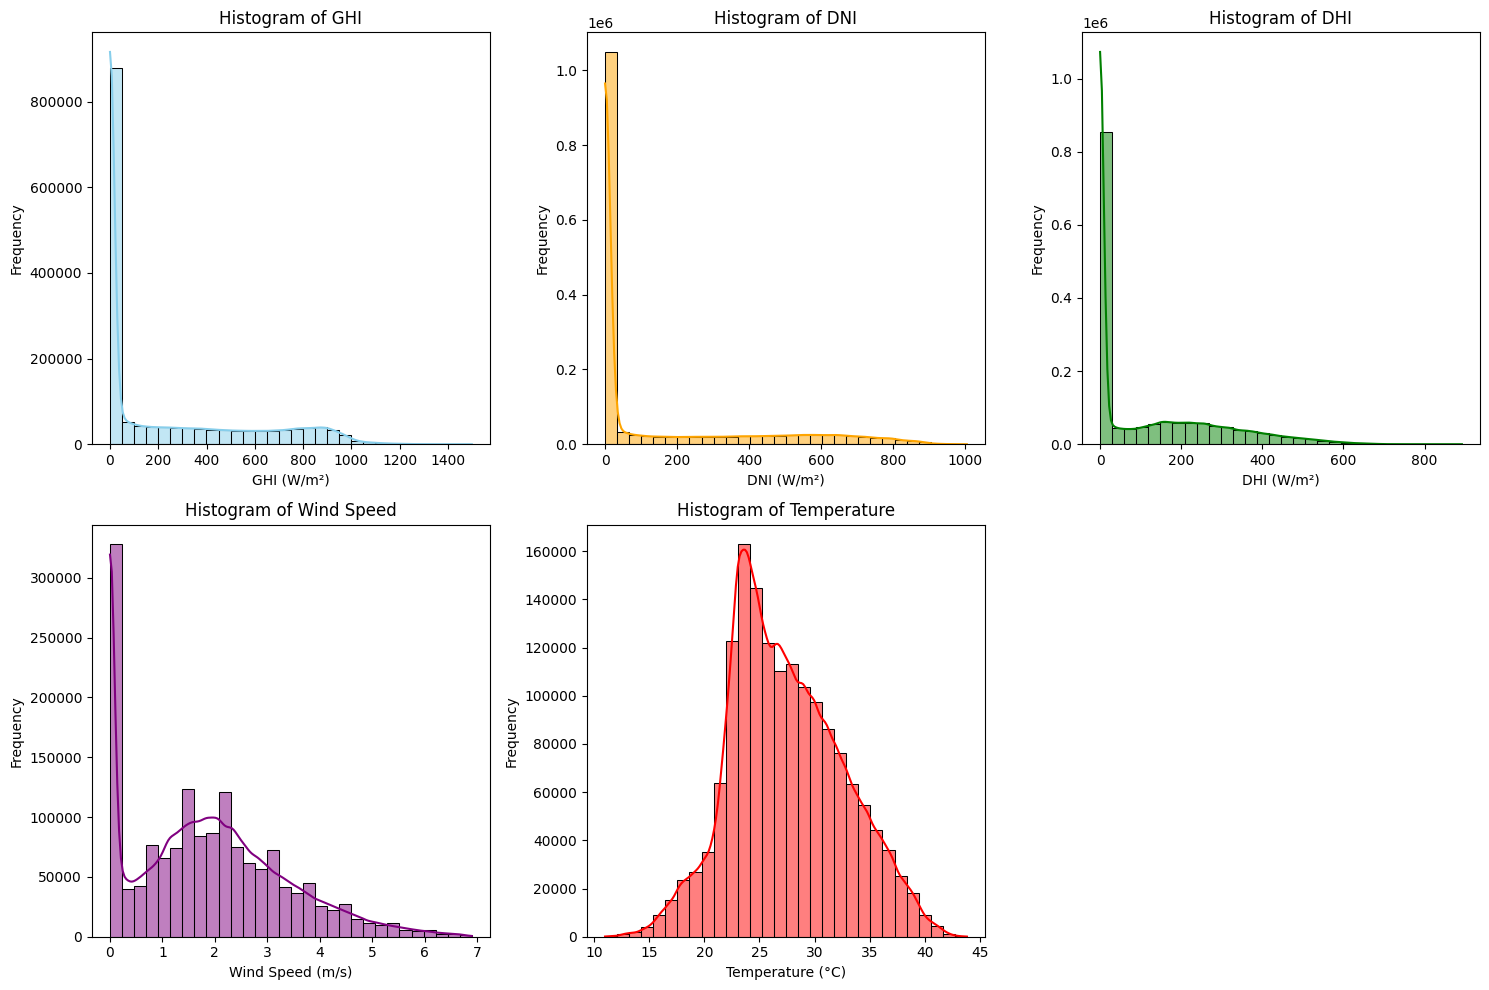

In [6]:
# frequency distributon histograms
frequency_distribution(merged_df)